# Forest Fire Damage Prediction

In [1]:
import pandas as pd
import numpy as np


In [2]:
fires = pd.read_csv('fires.csv')
fires.head()

,Unnamed: 0,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,1,7,5,mar,fri,86.2,26.2,94.3,5.1,NaN,51.0,6.7,0.0,0.0
1,2,7,4,oct,tue,90.6,NaN,669.1,6.7,18.0,33.0,0.9,0.0,0.0
2,3,7,4,oct,sat,90.6,43.7,NaN,6.7,14.6,33.0,1.3,0.0,0.0
3,4,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97.0,4.0,0.2,0.0
4,5,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99.0,NaN,0.0,0.0


In [3]:
fires.describe()

,Unnamed: 0,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,469.000000,496.000000,474.000000,515.000000,496.000000,487.000000,482.000000,485.000000,517.000000
mean,259.000000,4.669246,4.299807,90.580384,111.195363,550.673418,9.018835,18.884677,44.381930,4.021784,0.023093,12.847292
std,149.389312,2.313778,1.229900,5.698137,64.008450,246.061309,4.564890,5.748318,16.180372,1.794460,0.305532,63.655818
min,1.000000,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,130.000000,3.000000,4.000000,90.200000,70.800000,441.200000,6.450000,15.475000,33.000000,2.700000,0.000000,0.000000
50%,259.000000,4.000000,4.000000,91.600000,108.300000,664.500000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,388.000000,7.000000,5.000000,92.800000,141.575000,713.900000,10.750000,22.725000,53.500000,4.900000,0.000000,6.570000
max,517.000000,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [4]:
fires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  517 non-null    int64  
 1   X           517 non-null    int64  
 2   Y           517 non-null    int64  
 3   month       517 non-null    object 
 4   day         517 non-null    object 
 5   FFMC        469 non-null    float64
 6   DMC         496 non-null    float64
 7   DC          474 non-null    float64
 8   ISI         515 non-null    float64
 9   temp        496 non-null    float64
 10  RH          487 non-null    float64
 11  wind        482 non-null    float64
 12  rain        485 non-null    float64
 13  area        517 non-null    float64
dtypes: float64(9), int64(3), object(2)
memory usage: 56.7+ KB


### Data Preparation
I will change the month and day column to numbers using 1 to 12 to represent January to December and day column as 1 to 7 to represent Monday to Sunday.   
Afterwards, I will focus on the empty rows in the data to either update or discard them.

In [5]:
fires.month.unique()

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

In [6]:
fires.day.unique()

array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu'], dtype=object)

In [7]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_month = [['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']]
ordinal_day = [['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']]

fires['month'] = OrdinalEncoder(categories=ordinal_month, dtype=int).fit_transform(fires[['month']])+1
fires['day'] = OrdinalEncoder(categories=ordinal_day, dtype=int).fit_transform(fires[['day']])+1

In [8]:
fires.month.unique()

array([ 3, 10,  8,  9,  4,  6,  7,  2,  1, 12,  5, 11])

In [9]:
fires.rename(columns={'month':'month_1_jan',
                      'day':'day_1_mon'
                     }, inplace=True)

##### FFMC, DMC and DC column update
Fine fuel moisture code (ffmc) within the fire weather index (fwi) is a numeric rating of the moisture content of litter and other cure fine fuels. The daily ffmc is calculated based on weather data like temperature, humidity, wind speed etc. The DMC (duff moisture code) and DC (drought code) are all components of FWI the describe moiture content and are used to describe risk of fire. Therefore in order to fill the columns I will like to take into account the month of the missing. The idea behind this is that the weather is different accros every month of the year. I will explore the distribution of the data in the columns by month and use the mean values to impute the NaN values since the data is widely distributed. 

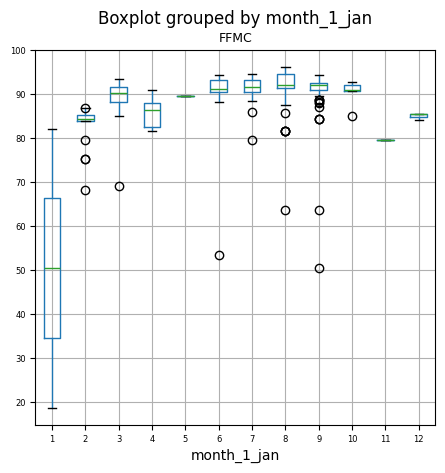

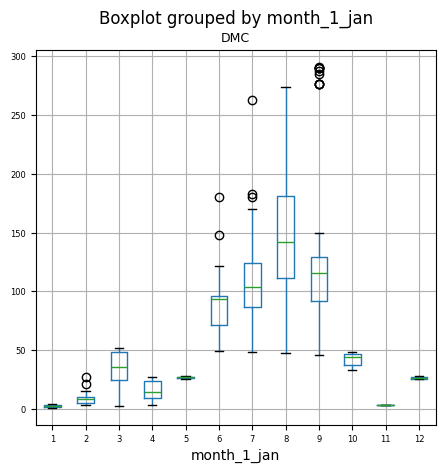

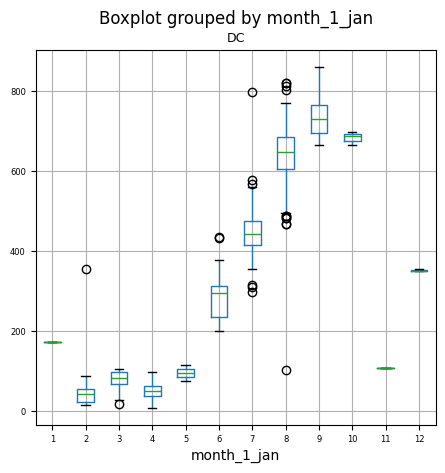

In [10]:
import matplotlib.pyplot as plt 

col = ['FFMC', 'DMC', 'DC']

for item in col:
    fires.boxplot(column=item, by='month_1_jan', figsize=(5,5), fontsize=6)
    plt.title(item, fontsize=9)
plt.show()


The results prove that the means of FFMC changes accross the month

In [11]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
weather_cols = pd.DataFrame(imp.fit_transform(fires[col]), columns=col)
fires.drop(col, axis = 1, inplace=True)
fires = pd.concat([fires, weather_cols], axis=1)
fires.head()

,Unnamed: 0,X,Y,month_1_jan,day_1_mon,ISI,temp,RH,wind,rain,area,FFMC,DMC,DC
0,1,7,5,3,5,5.1,NaN,51.0,6.7,0.0,0.0,86.2,26.200000,94.300000
1,2,7,4,10,2,6.7,18.0,33.0,0.9,0.0,0.0,90.6,111.195363,669.100000
2,3,7,4,10,6,6.7,14.6,33.0,1.3,0.0,0.0,90.6,43.700000,550.673418
3,4,8,6,3,5,9.0,8.3,97.0,4.0,0.2,0.0,91.7,33.300000,77.500000
4,5,8,6,3,7,9.6,11.4,99.0,NaN,0.0,0.0,89.3,51.300000,102.200000


In [12]:
fires[['ISI', 'temp', 'RH', 'wind', 'rain']].describe()

,ISI,temp,RH,wind,rain
count,515.000000,496.000000,487.000000,482.000000,485.000000
mean,9.018835,18.884677,44.381930,4.021784,0.023093
std,4.564890,5.748318,16.180372,1.794460,0.305532
min,0.000000,2.200000,15.000000,0.400000,0.000000
25%,6.450000,15.475000,33.000000,2.700000,0.000000
50%,8.400000,19.300000,42.000000,4.000000,0.000000
75%,10.750000,22.725000,53.500000,4.900000,0.000000
max,56.100000,33.300000,100.000000,9.400000,6.400000


##### Handing missing values in the remaining columns
The percentile distribution of the data in the remaining columns indicated no anomalies in the data except for rain column which has a suspicous value of max 6.4. I will check this row and the values surrounding the row. It may well be that the value is correct but I may have to drop it from the data as it may skew the rest of the data.

In [13]:
fires.loc[fires['rain']== 6.4]

,Unnamed: 0,X,Y,month_1_jan,day_1_mon,ISI,temp,RH,wind,rain,area,FFMC,DMC,DC
499,500,7,5,8,2,14.3,27.3,63.0,4.9,6.4,10.82,90.580384,181.1,671.2


In [14]:
fires.iloc[496:504]

,Unnamed: 0,X,Y,month_1_jan,day_1_mon,ISI,temp,RH,wind,rain,area,FFMC,DMC,DC
496,497,4,5,8,1,16.8,32.6,26.0,3.1,0.0,2.77,96.200000,175.5,661.8
497,498,3,4,8,2,14.3,32.3,27.0,2.2,0.0,14.68,96.100000,181.1,671.2
498,499,6,5,8,2,14.3,33.3,NaN,2.7,0.0,40.54,96.100000,181.1,671.2
499,500,7,5,8,2,14.3,27.3,63.0,4.9,6.4,10.82,90.580384,181.1,671.2
500,501,8,6,8,2,14.3,21.6,65.0,4.9,0.8,0.00,96.100000,181.1,671.2
501,502,7,5,8,2,14.3,21.6,65.0,4.9,0.8,0.00,96.100000,181.1,671.2
502,503,4,4,8,2,14.3,20.7,69.0,4.9,0.4,0.00,96.100000,181.1,671.2
503,504,2,4,8,3,20.0,29.2,30.0,4.9,NaN,1.95,94.500000,139.4,689.1


the number is an outlier compared to the values around it. if you look closely from index 499 to 501, you will observe that all the columns have nearly the same values meaning that the no drastic changes in fire weather index system though this is not entirely impossible to happen. Therefore I have chosen to update this row with the 0.8 value as in the other rows

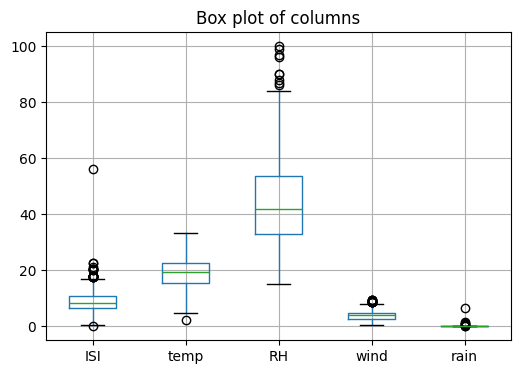

In [15]:
plt.figure(figsize=(6, 4))
fires.boxplot(column=['ISI', 'temp', 'RH', 'wind', 'rain'])
plt.title('Box plot of columns')
plt.show()

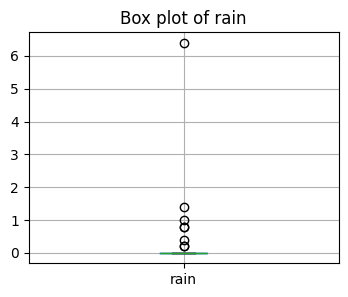

In [16]:
plt.figure(figsize=(4, 3))
fires.boxplot(column=['rain'])
plt.title('Box plot of rain')
plt.show()

In [17]:
# Investigating the biggest oulier value in ISI column
fires.loc[fires['ISI']>40]

,Unnamed: 0,X,Y,month_1_jan,day_1_mon,ISI,temp,RH,wind,rain,area,FFMC,DMC,DC
22,23,7,4,6,7,56.1,21.0,44.0,4.5,0.0,0.0,94.3,96.3,200.0


In [18]:
fires.iloc[18:25]

,Unnamed: 0,X,Y,month_1_jan,day_1_mon,ISI,temp,RH,wind,rain,area,FFMC,DMC,DC
18,19,6,4,3,3,6.3,15.9,35.0,4.0,0.0,0.0,89.2,111.195363,70.800000
19,20,6,4,4,6,5.1,9.3,44.0,4.5,0.0,0.0,86.3,27.400000,97.100000
20,21,6,4,9,2,7.0,18.3,40.0,2.7,NaN,0.0,91.0,129.500000,692.600000
21,22,5,4,9,1,9.2,19.1,38.0,2.7,0.0,0.0,91.8,78.500000,724.300000
22,23,7,4,6,7,56.1,21.0,44.0,4.5,0.0,0.0,94.3,96.300000,200.000000
23,24,7,4,8,6,6.2,19.5,43.0,5.8,0.0,0.0,90.2,110.900000,550.673418
24,25,7,4,8,6,20.3,23.7,32.0,5.8,0.0,0.0,93.5,139.400000,594.200000


ISI is initial spread index, a numerical rating of the expected fire rate of spread considering the impact of wind and fine fuel. Looking at the surrounding rows and their parameters around this ISI outlier in row 22, and applying this definition of ISI, it definitely points out that the value is wrong. If all the surrounding parameters are similar to it and have a much lower ISI, then it is very likely to be entry error. Therefore i will update this column with the mean value

In [19]:
fires.loc[22, 'ISI'] = fires['ISI'].mean()
fires.loc[499, 'rain'] = fires['rain'].mean()

In [20]:
fires[['ISI', 'temp', 'RH', 'wind', 'rain']].describe()

,ISI,temp,RH,wind,rain
count,515.000000,496.000000,487.000000,482.000000,485.000000
mean,8.927415,18.884677,44.381930,4.021784,0.009945
std,4.064152,5.748318,16.180372,1.794460,0.095698
min,0.000000,2.200000,15.000000,0.400000,0.000000
25%,6.450000,15.475000,33.000000,2.700000,0.000000
50%,8.400000,19.300000,42.000000,4.000000,0.000000
75%,10.700000,22.725000,53.500000,4.900000,0.000000
max,22.700000,33.300000,100.000000,9.400000,1.400000


The rest of the missing data in the column will be updated using the nearest neighbors 

In [21]:
from sklearn.impute import KNNImputer 

imputer = KNNImputer(missing_values=np.nan, n_neighbors=4, weights='distance')
updated_fires = pd.DataFrame(imputer.fit_transform(fires), columns=fires.columns)
updated_fires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   517 non-null    float64
 1   X            517 non-null    float64
 2   Y            517 non-null    float64
 3   month_1_jan  517 non-null    float64
 4   day_1_mon    517 non-null    float64
 5   ISI          517 non-null    float64
 6   temp         517 non-null    float64
 7   RH           517 non-null    float64
 8   wind         517 non-null    float64
 9   rain         517 non-null    float64
 10  area         517 non-null    float64
 11  FFMC         517 non-null    float64
 12  DMC          517 non-null    float64
 13  DC           517 non-null    float64
dtypes: float64(14)
memory usage: 56.7 KB


finally, I will be removing the Unnamed column, X and Y as this does not add any further information to the data or do not contribute to the data modelling

In [22]:
fires_clean = updated_fires.drop(['Unnamed: 0', 'X', 'Y'], axis = 1)
fires_clean.columns

Index(['month_1_jan', 'day_1_mon', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'FFMC', 'DMC', 'DC'],
      dtype='object')

#### Data Visualisations
By visualisations I can decide what features are important for the model and the outcome, and whether any of the features need transformed

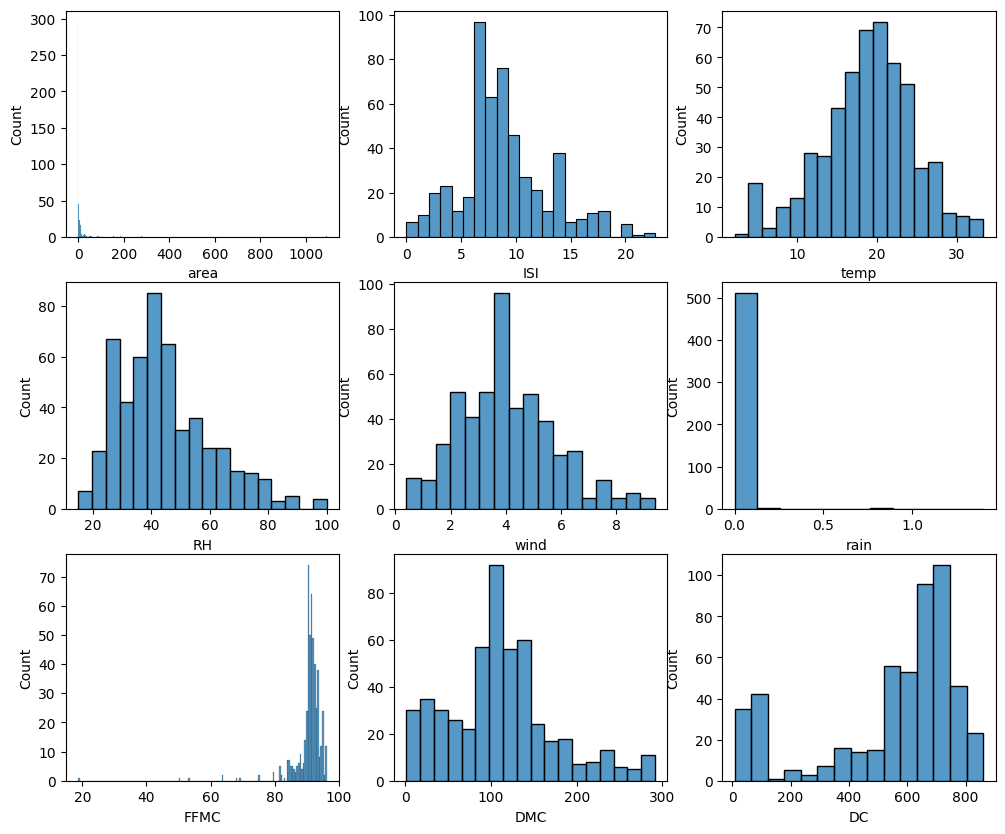

In [23]:
import seaborn as sns

col_list = ['area', 'ISI', 'temp', 'RH', 'wind', 'rain', 'FFMC', 'DMC', 'DC']

plt.figure(figsize=[12,10])

for idx, item in enumerate(col_list):
    ax = plt.subplot(3, 3, idx+1)
    sns.histplot(data = fires_clean, x=item, ax=ax)
plt.show()

The features distributions varied from normal distribution and skewed distributions. The outcome(area) is skewed to the right as well. I will therefore standardize these features and transform the area column to log in order to get a uniform distribution of the data.    
I intend to model the data using **`linear regression model`**

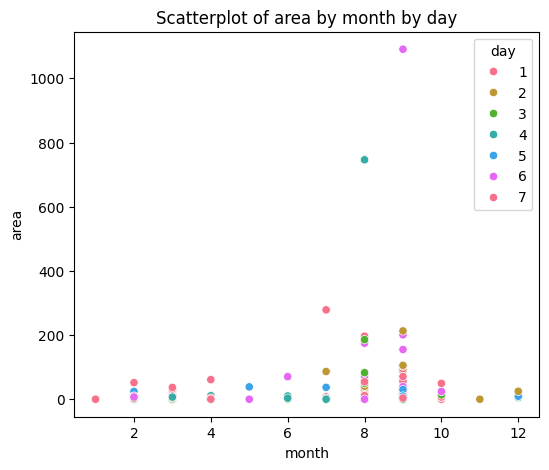

In [24]:
plt.rcParams['figure.figsize']=[6, 5]
plt.title('Scatterplot of area by month by day')
sns.scatterplot(data=fires_clean, x='month_1_jan', y='area', hue='day_1_mon', palette='husl')
plt.xlabel('month')
plt.legend(title='day')
plt.show()

The highest areas covered by the fire occured between the months of July and Sept. The fire area from July started going as high as 300 and up to >1000 by September.  This may be the result of major fire incident or simply because these are expectly the hotest season of the year. 

In [25]:
# transforming the area 
fires_clean['area_log'] = np.log1p(fires_clean['area'])

## looking for pearson corr
fires_corr = fires_clean.corr()
fires_corr

,month_1_jan,day_1_mon,ISI,temp,RH,wind,rain,area,FFMC,DMC,DC,area_log
month_1_jan,1.000000,-0.050837,0.224435,0.366335,-0.111055,-0.087918,0.012198,0.056496,0.286677,0.474769,0.812273,0.114280
day_1_mon,-0.050837,1.000000,0.006475,0.051608,0.100776,0.043691,-0.009038,0.023226,-0.037379,0.055906,0.016280,0.000208
ISI,0.224435,0.006475,1.000000,0.432298,-0.145528,0.102661,0.071547,0.013788,0.538286,0.332557,0.286948,0.006429
temp,0.366335,0.051608,0.432298,1.000000,-0.514345,-0.213632,0.029214,0.095775,0.396273,0.443083,0.472386,0.039745
RH,-0.111055,0.100776,-0.145528,-0.514345,1.000000,0.067123,0.169575,-0.077815,-0.301120,0.073160,-0.063876,-0.051147
wind,-0.087918,0.043691,0.102661,-0.213632,0.067123,1.000000,0.130992,0.007510,-0.014875,-0.094404,-0.200454,0.064852
rain,0.012198,-0.009038,0.071547,0.029214,0.169575,0.130992,1.000000,-0.019267,0.050822,0.094062,0.049627,-0.055100
area,0.056496,0.023226,0.013788,0.095775,-0.077815,0.007510,-0.019267,1.000000,0.042390,0.073614,0.045505,0.524134
FFMC,0.286677,-0.037379,0.538286,0.396273,-0.301120,-0.014875,0.050822,0.042390,1.000000,0.353621,0.318635,0.048918
DMC,0.474769,0.055906,0.332557,0.443083,0.073160,-0.094404,0.094062,0.073614,0.353621,1.000000,0.645267,0.070551


In [26]:
abs(fires_corr['area_log']).sort_values(ascending=False)

area_log       1.000000
area           0.524134
month_1_jan    0.114280
DMC            0.070551
wind           0.064852
DC             0.063904
rain           0.055100
RH             0.051147
FFMC           0.048918
temp           0.039745
ISI            0.006429
day_1_mon      0.000208
Name: area_log, dtype: float64

There are no strong correlations found between the features and the data. However, by general knowledge, I would like to use temperature (temp) and wind to model the data. But before that I will like to explore other methods of feature selection after standardizing the data.

In [27]:
from sklearn.preprocessing import StandardScaler

##splitting the data
X = fires_clean.drop(['area', 'area_log'], axis=1)
y = fires_clean['area_log']

scaler = StandardScaler()

scaled_X = scaler.fit_transform(X)


#### Feature Selections

In [28]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression 

lm = LinearRegression()

forward_select = SequentialFeatureSelector(estimator=lm, n_features_to_select=3, direction = 'forward')
forward_select.fit(X, y)

forward_features = forward_select.get_feature_names_out()
print(f'forward features: {forward_features}\n')

forward features: ['month_1_jan' 'rain' 'FFMC']



In [29]:
lm2 = LinearRegression()
backward_select = SequentialFeatureSelector(estimator=lm2, n_features_to_select=3, direction='backward')
backward_select.fit(X, y)

backward_features = backward_select.get_feature_names_out()
print(f'backward features: {backward_features}')

backward features: ['rain' 'FFMC' 'DC']


The forward and backward selection suggested two common features: rain and FFMC. Therefore I will choose two of these to create a linear modeal and also create another linear model based on my intended features (temp and wind) originally.

#### Modelling

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X1 = fires_clean[['temp', 'wind']]
y = fires_clean['area_log']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.2, random_state=20)

scaler = StandardScaler() 

X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.transform(X1_test)

lm_model1 = LinearRegression()
lm_model1.fit(X1_train, y1_train)

model1_prediction = lm_model1.predict(X1_test)
model1_train_mse = mean_squared_error(y1_train, lm_model1.predict(X1_train))

print('Model1 intercept', lm_model1.intercept_)
print('Model1 coefficients', lm_model1.coef_)
print('Model1 training mse', model1_train_mse)
print('Model1 traininng mse on original scale', np.expm1(model1_train_mse))

Model1 intercept 1.077723238048192
Model1 coefficients [0.06793009 0.11746376]
Model1 training mse 1.804085108590117
Model1 traininng mse on original scale 5.074411478641914


In [31]:
## Using rain and FFMC as suggested in feature selection
lm_model2 = LinearRegression()

X2 = fires_clean[['rain', 'FFMC']]
y = fires_clean['area_log']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=20)

X2_train = scaler.fit_transform(X2_train)
X2_test = scaler.transform(X2_test)

lm_model2.fit(X2_train, y2_train)

model2_prediction = lm_model2.predict(X2_test)
model2_train_mse = mean_squared_error(y2_train, lm_model2.predict(X2_train))

print('Model2 intercept', lm_model2.intercept_)
print('Model2 coefficients', lm_model2.coef_)
print('Model2 training mse', model2_train_mse)
print('Model2 traininng mse on original scale', np.expm1(model2_train_mse))

Model2 intercept 1.077723238048192
Model2 coefficients [-0.06956144  0.05154229]
Model2 training mse 1.8125377301580359
Model2 traininng mse on original scale 5.125973791480956


#### LASSO modelling

In [32]:
from sklearn.linear_model import LassoCV

X = fires_clean.drop(['area', 'area_log'], axis=1)
y = fires_clean['area_log']

X3_train, X3_test, y3_train, y3_test = train_test_split(X, y, test_size=0.2, random_state=20)

X3_train = scaler.fit_transform(X3_train)
X3_test = scaler.transform(X3_test)

lasso = LassoCV(cv=5, n_jobs= -1, alphas=np.linspace(0.1, 10000, num=100), random_state=20)
lasso.fit(X3_train, y3_train)
lasso_prediction = lasso.predict(X3_test)

lasso_train_mse = mean_squared_error(y3_train, lasso.predict(X3_train))

print('Lasso alpha_', lasso.alpha_)
print('lasso intercept', lasso.intercept_)
print('lasso coefficients', lasso.coef_)
print('lasso training mse', model2_train_mse)
print('lasso traininng mse on original scale', np.expm1(lasso_train_mse))

Lasso alpha_ 10000.0
lasso intercept 1.077723238048192
lasso coefficients [ 0.  0. -0.  0. -0.  0. -0.  0.  0.  0.]
lasso training mse 1.8125377301580359
lasso traininng mse on original scale 5.170054613770913


In [33]:
X.columns

Index(['month_1_jan', 'day_1_mon', 'ISI', 'temp', 'RH', 'wind', 'rain', 'FFMC',
       'DMC', 'DC'],
      dtype='object')

#### Polynomial features
between rain and FFMC , i will choose rain for modelling with polynomial instead of using both because of the number of features generated from polynomial which may overfit the linear regression. Also I am using only rain because it has a higher correlation coefficient (0.05) than FFMC (0.04) as seen earlier. 

In [34]:
from sklearn.preprocessing import PolynomialFeatures 

X4 = fires_clean[['rain']].values.reshape(-1,1)
y4 = fires_clean['area_log']

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=20)

polynomial = PolynomialFeatures(degree = 2, include_bias=True)
X4_train = polynomial.fit_transform(X4_train)
X4_test = polynomial.transform(X4_test)

lm_model4 = LinearRegression()

lm_model4.fit(X4_train, y4_train)
model4_prediction = lm_model4.predict(X4_test)

model4_train_mse = mean_squared_error(y4_train, lm_model4.predict(X4_train))


print('Model4 intercept', lm_model4.intercept_)
print('Model4 coefficients', lm_model4.coef_)
print('Model4 training mse', model4_train_mse)
print('Model4 traininng mse on original scale', np.expm1(model4_train_mse))

Model4 intercept 1.0896321120023915
Model4 coefficients [ 0.         -4.05003122  2.96190284]
Model4 training mse 1.8070451475928309
Model4 traininng mse on original scale 5.092418611296767


#### Spline model
Finally i will use spline to see if i get a better training results for comparisons

In [35]:
from sklearn.preprocessing import SplineTransformer

X5 = fires_clean[['temp','wind']]
y5 = fires_clean['area_log']

X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.2, random_state=20)

spline = SplineTransformer(n_knots=2)
X5_train = spline.fit_transform(X5_train)
X5_test = spline.transform(X5_test)

X5_train = scaler.fit_transform(X5_train)
X5_test = scaler.transform(X5_test)

lm_model5 = LinearRegression()
lm_model5.fit(X5_train, y5_train)
model5_prediction = lm_model5.predict(X5_test)

model5_train_mse= mean_squared_error(y5_train, lm_model5.predict(X5_train))

print('Model5 intercept', lm_model5.intercept_)
print('Model5 coefficients', lm_model5.coef_)
print('Model5 training mse', model5_train_mse)
print('Model5 training mse on original scale', np.expm1(model5_train_mse))

Model5 intercept 1.0777232380481965
Model5 coefficients [ 0.60543313 -0.48005868  0.41080299 -0.29903286 -0.28508663  0.24390427
 -0.22276007  0.33671252]
Model5 training mse 1.7631819903876045
Model5 training mse on original scale 4.830961971202581


#### K-Fold Cross validation of all the models

In [36]:
## Model 1 cross validation 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

X = fires_clean.drop(['area', 'area_log'], axis=1)
y = fires_clean['area_log']

pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', LinearRegression())
                ])

score_model1 = cross_val_score(pipe, X[['temp', 'wind']], y, cv=5, scoring='neg_mean_squared_error')
score_model2 = cross_val_score(pipe, X[['rain', 'FFMC']], y, cv=5, scoring='neg_mean_squared_error')


lasso_pipe = Pipeline([('scaler', StandardScaler()),
                       ('model', LassoCV(cv=5, n_jobs= -1, random_state=20))
                      ])
lasso_score = cross_val_score(lasso_pipe, X, y, cv=5, scoring='neg_mean_squared_error')

polynomial_pipe = Pipeline([('polynomial', PolynomialFeatures(degree = 2, include_bias=True)),
                            ('model', LinearRegression())
                           ])
polynomial_score = cross_val_score(polynomial_pipe, X[['rain']].values.reshape(-1,1), y, cv=5, scoring='neg_mean_squared_error')

spline_pipe = Pipeline([('spline', SplineTransformer(n_knots=2)),
                        ('scaler', StandardScaler()),
                        ('model', LinearRegression())
                       ])
spline_score = cross_val_score(spline_pipe, X[['temp', 'wind']], y, cv=5, scoring='neg_mean_squared_error')



In [37]:
model1_cv_mse = -score_model1
model2_cv_mse = -score_model2
lasso_cv_mse = -lasso_score
poly_cv_mse = -polynomial_score
spline_cv_mse = -spline_score

print('CV score model 1 is     ', model1_cv_mse.mean(), '  SD   ', model1_cv_mse.std())
print('CV score model 2 is     ', model2_cv_mse.mean(), '  SD   ', model2_cv_mse.std())
print('CV score lasso is       ', lasso_cv_mse.mean(), '  SD   ', lasso_cv_mse.std())
print('CV score polynomial is   ', poly_cv_mse.mean(), '  SD   ', poly_cv_mse.std())
print('CV score spline is      ', spline_cv_mse.mean(), '  SD   ', spline_cv_mse.std())

CV score model 1 is      2.2100073831487173   SD    1.0609425019596146
CV score model 2 is      2.172393135074311   SD    1.0044920478077999
CV score lasso is        2.2527407310153893   SD    1.0330881997504278
CV score polynomial is    2.1728726771843916   SD    1.002115388029296
CV score spline is       2.1827001259070884   SD    0.9940116061218377


In [38]:
print('CV score model 1 on original scale   ', np.expm1(model1_cv_mse.mean()))
print('CV score model 2 on original scale    ', np.expm1(model2_cv_mse.mean()))
print('CV score lasso on original scale    ', np.expm1(lasso_cv_mse.mean()))
print('CV score polynomial on original scale   ', np.expm1(poly_cv_mse.mean()))
print('CV score spline on original scale    ', np.expm1(spline_cv_mse.mean()))

CV score model 1 on original scale    8.115783695978553
CV score model 2 on original scale     7.779268897252393
CV score lasso on original scale     8.513774834876921
CV score polynomial on original scale    7.783479935988851
CV score spline on original scale     7.870224676269741


Based on cross validation, the best performing model is the model 2 which used rain and FFMC to model the data. This is followed closely by the polynomial model which used only rain transformed to degree 2 to model the data. However, all the models performed similarly with each other and the log transformations show that the linear model is not performing as expected for the data. It suggests that maybe linear model is not the best way to go for this ML model.

I will however calculate the residuals for the model 2 with the actual y values and see what the model might be lacking.  Recall that the model 2 was called lm_model2 from above and that the data was split as X2 and y2 for training and testing

In [39]:
##geting polynomial predictions
model2_prediction = lm_model2.predict(X2_test)

## transforming the log values to original values
true_y = np.expm1(y2_test)
prediction = np.expm1(model2_prediction)

residuals = true_y - prediction

In [40]:
residuals_mean = np.mean(residuals)
residuals_mean

np.float64(21.149827840366463)

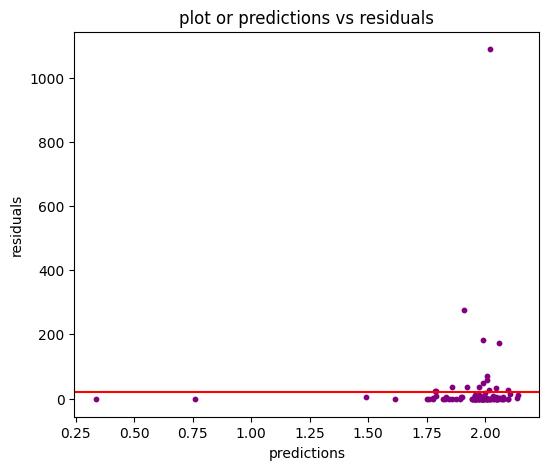

In [41]:
plt.scatter(prediction, residuals, color='purple', s=10)
plt.axhline(residuals_mean, color='red')
plt.title('plot or predictions vs residuals')
plt.ylabel('residuals')
plt.xlabel('predictions')
plt.show()

### Conclusion
As expected from the cross validation results, the linear model performance is not great for our ML in this case. The mean of the residuals is not anywhere near zero and this is is seen in the plot of the residuals. But in anycase, it is good to see how far I could get in trying to model the forest fires by linear regression